# Museum Detection (COMP 6721)

Done by:

1. Bhavya Patel (40304250)
2. Yashesh Sorathia (40267022)
3. Chama Amri Toudrhi (40180557)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Extracting the dataset from the zip file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/museum_train.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# importing the necessary libraries
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

### Dataset Loading and Preprocessing
- **Dataset Paths**:
  - Indoor images: `museum_train/indoor`
  - Outdoor images: `museum_train/outdoor`
- **Preprocessing Steps**:
  - Resize images to `64x64` pixels.
  - Convert images to grayscale (optional).
  - Flatten images into 1D arrays.
  - Normalize pixel values to the range `[0, 1]`.
- **Labels**:
  - Indoor: `0`
  - Outdoor: `1`

In [4]:
# Define paths for indoor and outdoor training images
indoor_train_path = 'museum_train/indoor'
outdoor_train_path = 'museum_train/outdoor'

In [5]:
# Function to load images from a folder and preprocess them
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        # Open and resize the image
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((64, 64))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255 # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(label)
    return images, labels

In [6]:
# Load indoor and outdoor images
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [7]:
# Combine indoor and outdoor images into a single dataset
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
- **Model 1**: Gradient Boosting Classifier with default hyperparameters.
  - Learning Rate: `0.01`
  - Number of Estimators: `10`
- **Model 2**: Gradient Boosting Classifier with increased estimators and `max_features='sqrt'`.
  - Learning Rate: `0.01`
  - Number of Estimators: `100`
  - Max Features: `sqrt`
- **Model 3**: Gradient Boosting Classifier with further hyperparameter tuning.
  - Learning Rate: `0.001`
  - Number of Estimators: `500`
  - Max Features: `sqrt`
  - Max Depth: `10`
  - Subsample: `0.5`
- **Evaluation Metrics**:
  - Accuracy, Precision, Recall, F1-Score, and Confusion Matrix.

### Training Model 1 : Gradient Boosting Classifier with default hyperparameters

In [9]:
model_1 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=10,
                                   verbose=1,
                                   random_state=42,)
model_1.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3827            2.53m
         2           1.3792            2.03m
         3           1.3758            1.46m
         4           1.3725            1.09m
         5           1.3695           50.56s
         6           1.3662           37.80s
         7           1.3631           27.24s
         8           1.3601           17.63s
         9           1.3570            8.65s
        10           1.3542            0.00s


GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42,
                           verbose=1)

### Evaluation Metrics for model 1


Accuracy: 67.15%
Precision: 63.06%
Recall: 80.87%
F1 Score: 70.86%


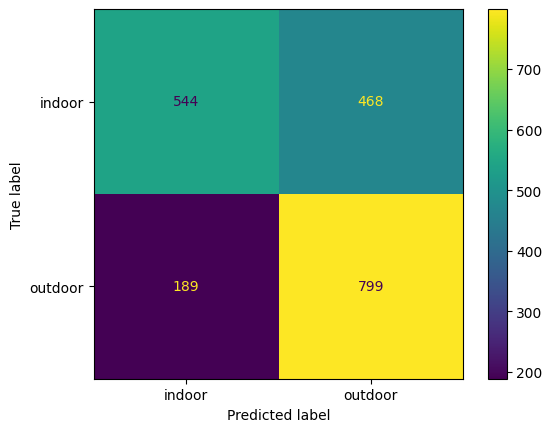

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

y_pred = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

### Testing on a Single Image
- A single image is loaded, preprocessed, and passed through the trained model for prediction.
- The image is resized, converted to grayscale, flattened, and normalized before prediction.

In [11]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((64, 64))
    img = img.convert('L')
    img = np.array(img).flatten()
    img = img/255
    return img

In [12]:
my_img = load_single_images('/content/test_image_1.jpg')

In [13]:
# Test Model 1 on a single image
if(model_1.predict(my_img.reshape(1,-1)) == 0):
  print("Indoor Museum")
else:
  print("Outdoor Museum")

Indoor Museum


### Training Model 2: Gradient Boosting Classifier with increased estimators and max_features='sqrt

In [14]:
model_2 = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=100,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt')
model_2.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3833            9.79s
         2           1.3803            9.93s
         3           1.3773            9.71s
         4           1.3741            9.54s
         5           1.3711            9.73s
         6           1.3682            9.58s
         7           1.3654            9.44s
         8           1.3626            9.33s
         9           1.3599            9.20s
        10           1.3570            9.07s
        20           1.3313            8.02s
        30           1.3085            7.31s
        40           1.2887            6.68s
        50           1.2705            5.81s
        60           1.2543            4.57s
        70           1.2371            3.37s
        80           1.2226            2.21s
        90           1.2086            1.10s
       100           1.1950            0.00s


GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           random_state=42, verbose=1)

### Evaluation Metrics for model 2


Accuracy: 69.30%
Precision: 66.23%
Recall: 77.23%
F1 Score: 71.31%


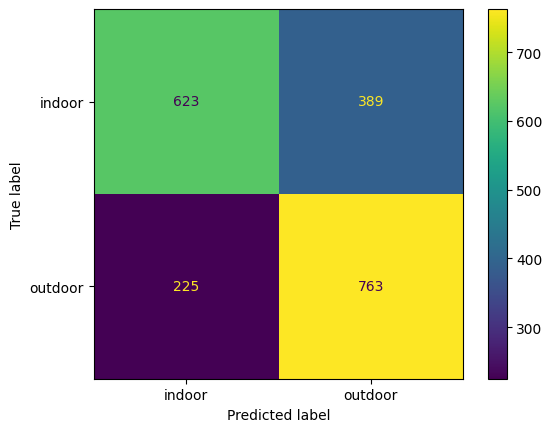

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

y_pred = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

### Testing on a test image

In [16]:
# Test Model 2 on a single image
if(model_2.predict(my_img.reshape(1,-1)) == 0):
  print("Indoor Museum")
else:
  print("Outdoor Museum")

Indoor Museum


### Training Model 3: Gradient Boosting Classifier with further hyperparameter tuning

In [17]:
model_3 = GradientBoostingClassifier(learning_rate=0.001,
                                   n_estimators=500,
                                   verbose=1,
                                   random_state=42,
                                   max_features='sqrt',
                                   max_depth=10,
                                   subsample=0.5)
model_3.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3849           0.0006            1.74m
         2           1.3841           0.0010            1.79m
         3           1.3834           0.0008            1.78m
         4           1.3826           0.0010            1.82m
         5           1.3816           0.0008            1.82m
         6           1.3805           0.0010            1.86m
         7           1.3794           0.0007            1.86m
         8           1.3784           0.0009            1.86m
         9           1.3780           0.0012            1.85m
        10           1.3768           0.0007            1.84m
        20           1.3679           0.0010            1.78m
        30           1.3595           0.0013            1.92m
        40           1.3507           0.0009            1.87m
        50           1.3425           0.0014            1.80m
        60           1.3332          -0.0001            1.75m
       

GradientBoostingClassifier(learning_rate=0.001, max_depth=10,
                           max_features='sqrt', n_estimators=500,
                           random_state=42, subsample=0.5, verbose=1)

### Evaluation Metrics for model 3


Accuracy: 76.40%
Precision: 75.80%
Recall: 76.72%
F1 Score: 76.26%


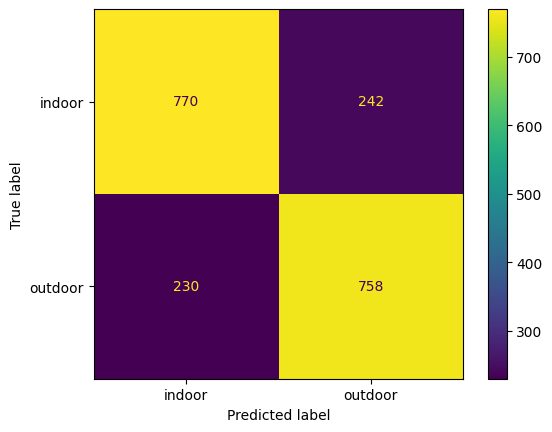

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

### Testing on a test image

In [19]:
if(model_3.predict(my_img.reshape(1,-1)) == 0):
  print("Indoor Museum")
else:
  print("Outdoor Museum")

Indoor Museum


### Saving all models

In [20]:
import pickle

def save_model_pickle(model, path="model.pkl"):
    with open(path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {path}")


save_model_pickle(model_1, "museum_detection_boosting_model_1.pkl")
save_model_pickle(model_2, "museum_detection_boosting_model_2.pkl")
save_model_pickle(model_3, "museum_detection_boosting_model_3.pkl")

Model saved to museum_detection_boosting_model_1.pkl
Model saved to museum_detection_boosting_model_2.pkl
Model saved to museum_detection_boosting_model_3.pkl


## Comparing all three models


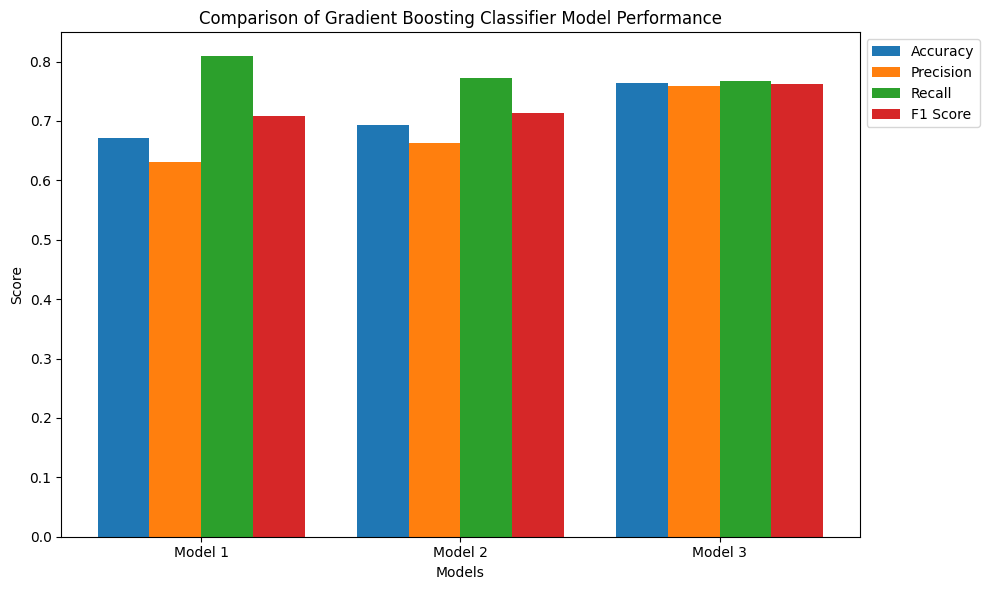

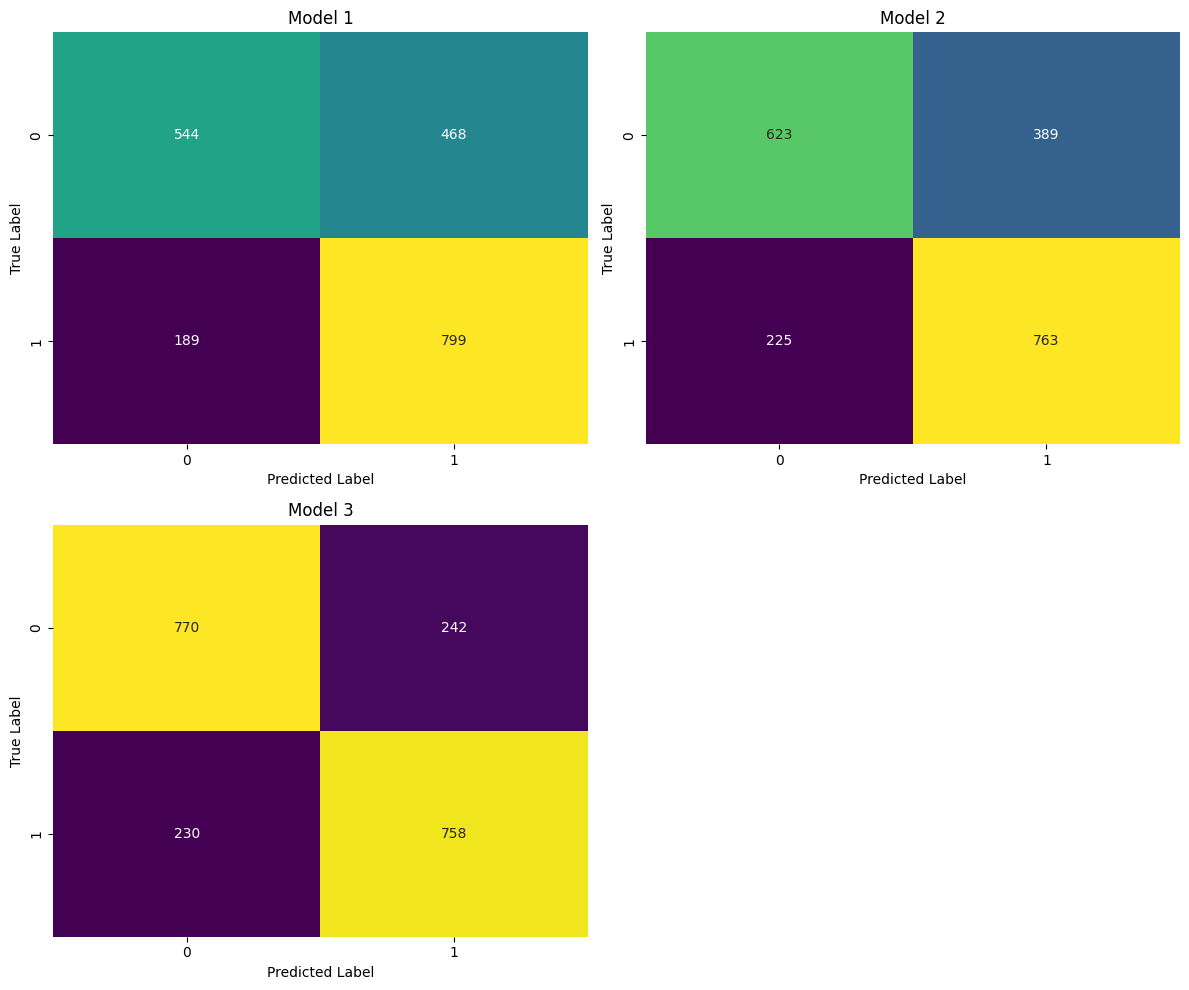

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

# Assuming you have already trained three models and have their predictions
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

# Compute evaluation metrics for each model
models = ["Model 1", "Model 2", "Model 3"]
accuracy = [accuracy_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_3)]
precision = [precision_score(y_test, y_pred_1), precision_score(y_test, y_pred_2), precision_score(y_test, y_pred_3)]
recall = [recall_score(y_test, y_pred_1), recall_score(y_test, y_pred_2), recall_score(y_test, y_pred_3)]
f1_score_values = [f1_score(y_test, y_pred_1), f1_score(y_test, y_pred_2), f1_score(y_test, y_pred_3)]

# Create a grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, accuracy, width, label="Accuracy")
ax.bar(x - 0.5*width, precision, width, label="Precision")
ax.bar(x + 0.5*width, recall, width, label="Recall")
ax.bar(x + 1.5*width, f1_score_values, width, label="F1 Score")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Comparison of Gradient Boosting Classifier Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Ensures everything fits well
plt.show()

print()

# Generate and plot Confusion Matrices with 2-row layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns for layout
axes = axes.flatten()  # Flatten for easy iteration

# Confusion matrices for each model
y_preds = [y_pred_1, y_pred_2, y_pred_3]

for i, (ax, model, y_pred) in enumerate(zip(axes, models, y_preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", ax=ax, cbar=False)
    ax.set_title(model)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Remove the last subplot (extra blank space if only 3 models)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()